In [40]:
import seml
import seaborn as sns
from poisson_atac.utils import model_type_map
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [41]:
from poisson_atac.utils import load_experiment

In [42]:
from statannotations.Annotator import Annotator
import itertools

In [86]:
save_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/'
fig_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/Figure2/'

In [44]:
dataset_map = {'neurips': 'Neurips\nall batches', 'hematopoiesis': 'Satpathy\net al.'}

In [45]:
def load_seml(seml_database):
    results = seml.get_results(seml_database, to_data_frame=True,  fields=["config", "config_hash", "result", "batch_id"])

    results['config.data.dataset'] = results['config.data.dataset'].map(dataset_map)
    results['config.setup.model_params.use_observed_lib_size'] = results['config.setup.model_params.use_observed_lib_size'].map({True: "True", False: "False", np.nan: ''})
    results['config.model.model_type'] = results['config.model.model_type'] + results['config.setup.model_params.use_observed_lib_size'].astype(str) 
    results["config.model.model_type"] = results["config.model.model_type"].map(model_type_map)

    return results

In [46]:
model_order = [model_type_map['poissonviTrue'], model_type_map['binaryviTrue'], model_type_map['poissonviFalse'], model_type_map["peakvi"]]

In [47]:
seml_database = 'atac_to_atac'

In [48]:
results = load_seml(seml_database)

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

In [49]:
results

,_id,batch_id,config_hash,config.overwrite,config.db_collection,config.data.batch,config.data.dataset,config.model.model_type,config.optimization.regularization.learning_rate,config.optimization.regularization.weight_decay,...,config.seed,result.test_cells,result.test_cells_counts,result.embedding,result.average_precision,result.rmse,result.bce,result.nmi,result.ari,result.model_path
0,1,1,df10f465df1fffce49cdfab6b76f076f,1,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12340...,0 NMI_cluste...,0.235165,0.155896,11091.780654,0.756231,0.706264,/storage/groups/ml01/workspace/laura.martens/a...
1,2,1,88e513708fc67d6d1551475a95af51de,2,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (obs. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12019...,0 NMI_cluste...,0.269281,0.154149,10813.440339,0.746448,0.671021,/storage/groups/ml01/workspace/laura.martens/a...
2,3,1,c6c356eb75c850b4486d7a3212518fa3,3,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12328...,0 NMI_cluste...,0.236160,0.155780,11074.442928,0.747380,0.696933,/storage/groups/ml01/workspace/laura.martens/a...
3,4,1,5c4f7a50d51ff2949ca583b19418c2a7,4,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (obs. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12017....,0 NMI_cluste...,0.269407,0.154142,10811.580137,0.759786,0.707106,/storage/groups/ml01/workspace/laura.martens/a...
4,5,1,ebc285922517901abe53b10038c74030,5,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12331...,0 NMI_cluste...,0.236045,0.155813,11080.731466,0.756329,0.706352,/storage/groups/ml01/workspace/laura.martens/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,155,7,e175c749dcae62f4105b3909a6326574,155,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.243685,0.182825,17368.802755,0.818149,0.719700,/storage/groups/ml01/workspace/laura.martens/a...
146,156,7,8c8f7d7898ff312cf3dce968208ca6c1,156,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.247330,0.185191,17755.881027,0.815225,0.704560,/storage/groups/ml01/workspace/laura.martens/a...
147,157,7,103b404808a9d5ae44c55e3ac8326c1b,157,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.245337,0.184666,17662.904195,0.811129,0.708289,/storage/groups/ml01/workspace/laura.martens/a...
148,158,7,0c5a89fd6bad7e06e614b12c24e32609,158,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.243028,0.183037,17406.027552,0.809350,0.696343,/storage/groups/ml01/workspace/laura.martens/a...


In [50]:
df = results[results["config.data.batch"].isna()] #filtering for test data

In [51]:
df.groupby(['config.data.dataset', 'config.model.model_type', 'config.setup.model_params.n_latent']).size()

config.data.dataset   config.model.model_type  config.setup.model_params.n_latent
Neurips\nall batches  Binary VAE (enc. ls)     60                                    5
                      Binary VAE (obs. ls)     60                                    5
                      PeakVI                   80                                    5
                      Poisson VAE (enc. ls)    70                                    5
                      Poisson VAE (obs. ls)    100                                   5
Satpathy\net al.      Binary VAE (enc. ls)     60                                    5
                                               100                                   5
                      Binary VAE (obs. ls)     60                                    5
                                               100                                   5
                      PeakVI                   70                                    5
                                               8

In [52]:
# filtering for double runs
df1 = df.loc[df['config.data.dataset'] == dataset_map['neurips']]

df2 = df.loc[df['config.data.dataset'] == dataset_map['hematopoiesis']]

df2.drop(df2.index[(df2['batch_id'] < 7) & (df2['config.model.model_type'] != model_type_map['poissonviTrue'])], inplace =True)

df = pd.concat([df1, df2])

/tmp/ipykernel_28135/759144987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.index[(df2['batch_id'] < 7) & (df2['config.model.model_type'] != model_type_map['poissonviTrue'])], inplace =True)


In [78]:
def create_annotated_boxplot(data, pairs, x, y, hue, hue_order, order, test, ax, x_label=None, y_label=None, legend=True, y_lim=None):
    sns.boxplot(data = data, x=x, y=y, hue=hue, hue_order = hue_order, order=order, orient="v", ax=ax)
    annot = Annotator(ax, pairs, data=data, x=x, y=y, order=order, hue=hue, hue_order=hue_order, orient="v")
    annot.configure(test=test, verbose=0, text_format='star', loc='outside')
    annot.apply_test()
    ax, test_results = annot.annotate()
    
        
    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel("")
        #plt.xlabel(x.split(".")[-1])
        
    if y_label:
        plt.ylabel(y_label)
    else:
        plt.ylabel("")
        ax.axes.get_yaxis().set_ticklabels([])
        #ax.axes.get_yaxis().set_visible(False)
        #plt.ylabel(y.split(".")[-1])
        
    if y_lim:
        plt.ylim(y_lim)
        
    if legend:
        plt.legend()
    else:
        ax.axes.get_legend().set_visible(False)
        
    plt.tight_layout()
    return ax

In [84]:
def plot_metrics_per_dataset(data, dataset, x, y, hue, hue_order, y_label, save_path, figsize):
    data = data.loc[data['config.data.dataset'] == dataset]
    pairs_prelim = [list(itertools.product([dataset], model_order))]
    pairs = [list(itertools.combinations(dataset, 2)) for dataset in pairs_prelim]

    fig, ax = plt.subplots(figsize=figsize)
    ax = create_annotated_boxplot(data = data, pairs=pairs[0][:], y=y, x=x, hue=hue, order=None, hue_order=hue_order, ax = ax, test='t-test_paired', y_label=y_label)
    fig.savefig(os.path.join(fig_path, f'{dataset}_{y.split(".")[-1]}.pdf'))
    fig.savefig(os.path.join(fig_path, f'{dataset}_{y.split(".")[-1]}.png'))
    

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


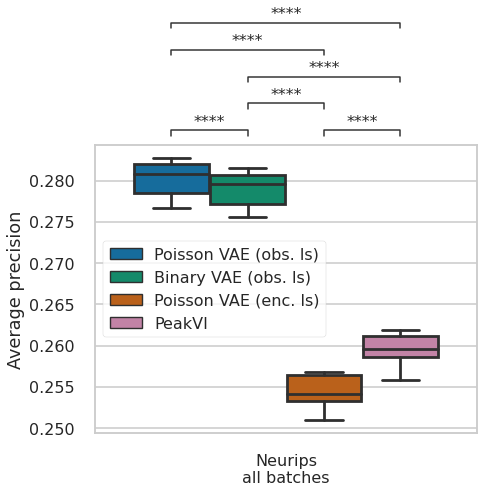

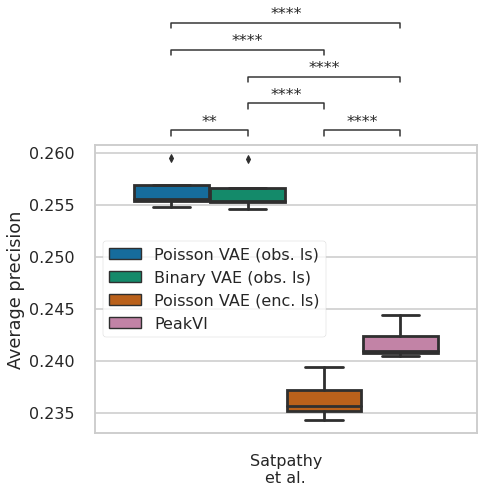

In [90]:
plot_metrics_per_dataset(data=df, dataset=dataset_map['neurips'], x='config.data.dataset', y='result.average_precision', hue='config.model.model_type', hue_order=model_order, y_label="Average precision", save_path=fig_path, figsize=(7,8))
plot_metrics_per_dataset(data=df, dataset=dataset_map['hematopoiesis'], x='config.data.dataset', y='result.average_precision', hue='config.model.model_type', hue_order=model_order, y_label="Average precision", save_path=fig_path, figsize=(7,8))
    

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


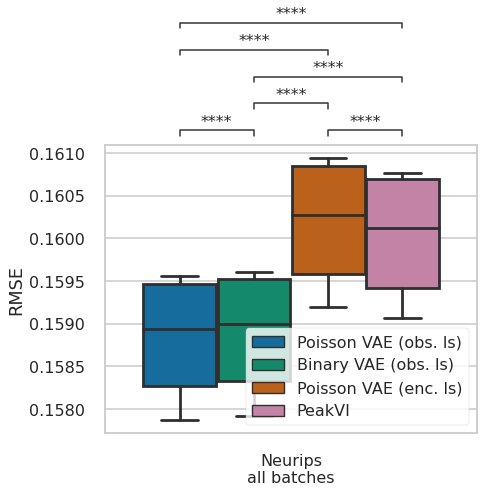

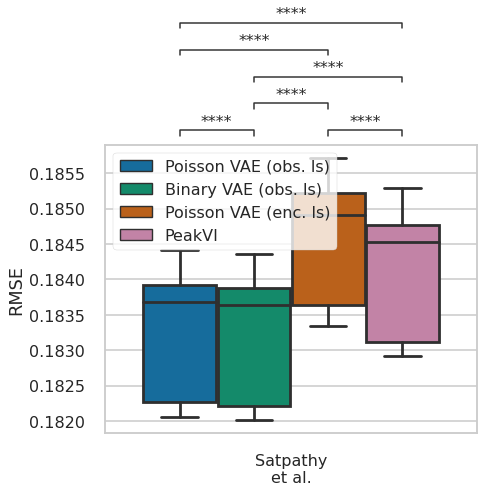

In [91]:
plot_metrics_per_dataset(data=df, dataset=dataset_map['neurips'], x='config.data.dataset', y='result.rmse', hue='config.model.model_type', hue_order=model_order, y_label="RMSE", save_path=fig_path, figsize=(7,8))
plot_metrics_per_dataset(data=df, dataset=dataset_map['hematopoiesis'], x='config.data.dataset', y='result.rmse', hue='config.model.model_type', hue_order=model_order, y_label="RMSE", save_path=fig_path, figsize=(7,8))
    

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


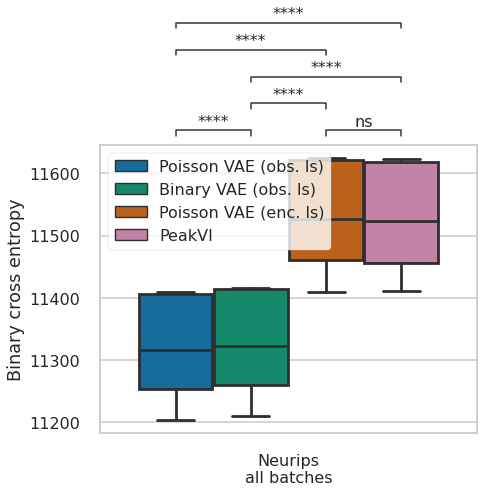

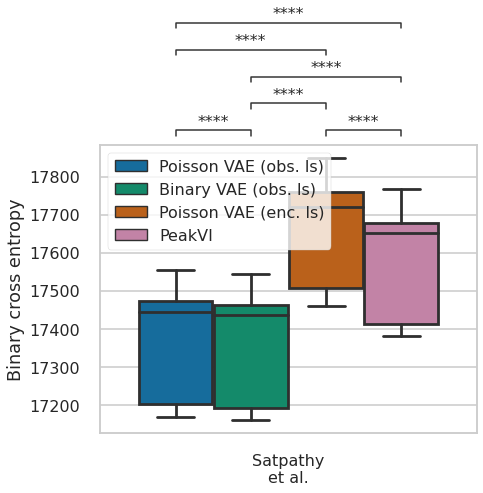

In [92]:
plot_metrics_per_dataset(data=df, dataset=dataset_map['neurips'], x='config.data.dataset', y='result.bce', hue='config.model.model_type', hue_order=model_order, y_label="Binary cross entropy", save_path=fig_path, figsize=(7,8))
plot_metrics_per_dataset(data=df, dataset=dataset_map['hematopoiesis'], x='config.data.dataset', y='result.bce', hue='config.model.model_type', hue_order=model_order, y_label="Binary cross entropy", save_path=fig_path, figsize=(7,8))
    

# Plot embedding

In [116]:
import scanpy as sc
sc.settings.figdir = fig_path


In [109]:
from poisson_atac.utils import load_experiment, compute_embedding

In [110]:
from poisson_atac.seml.atac_to_atac.cross_validation.cv_atac_to_atac import get_experiment

## Determine best embeddings based on nmi

In [102]:
best = df.sort_values('result.nmi', ascending=False).groupby(['config.data.dataset', 'config.model.model_type']).first()

## PeakVI

In [107]:
model_hash=best.loc[(dataset_map['neurips'], model_type_map["peakvi"]), "config_hash"]

In [108]:
model_hash

'b3feda37c38d60b1e99b4c279240ba2e'

In [112]:
ex, model, config = load_experiment(seml_database, model_hash, get_experiment)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_peaks' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/atac_fragments' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/reads_in_peaks_frac' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/

PEAKVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
        (Layer 1): Sequential(
          (0): Linear(in_features=341, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=80, bias=True)
    (var_encoder): Linear(in_features=341, out_features=80, bias=True)
  )
  (z_decoder): Decoder(
    (px_decoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=93, out_features=34

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [113]:
X_emb = model.get_latent_representation(ex.adata)
compute_embedding(ex.adata, X_emb)

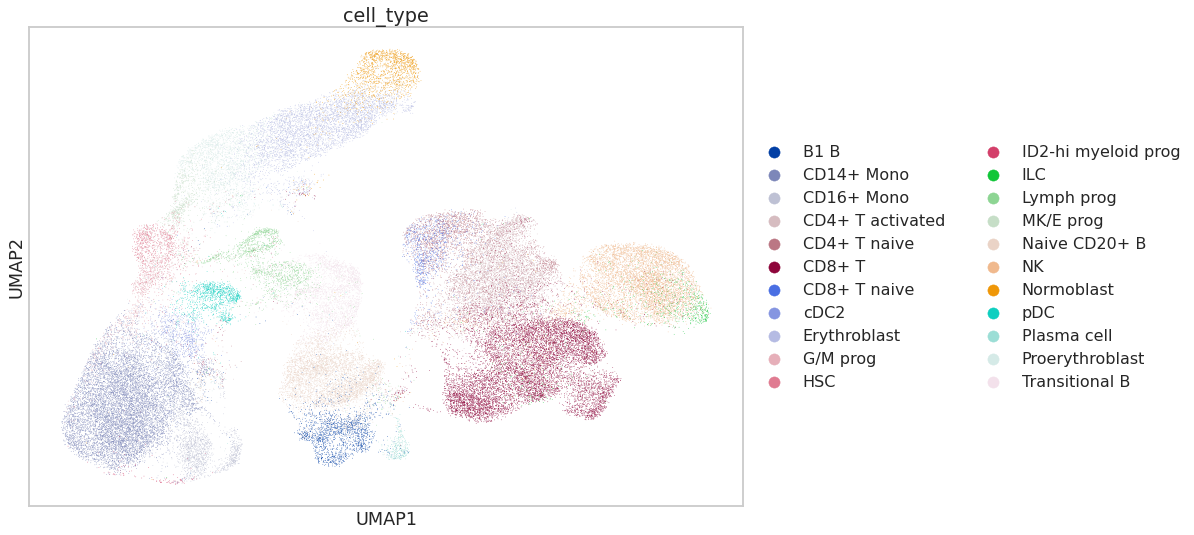

In [122]:
sc.pl.umap(ex.adata, color="cell_type", save="peakvi.png")

## Poisson, observed ls

In [123]:
model_hash=best.loc[(dataset_map['neurips'], model_type_map["poissonviTrue"]), "config_hash"]

In [124]:
model_hash

'9d5438f87b65bec8d8a2975f1f8bd077'

In [125]:
ex, model, config = load_experiment(seml_database, model_hash, get_experiment)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_peaks' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/atac_fragments' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/reads_in_peaks_frac' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/

PoissonVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
        (Layer 1): Sequential(
          (0): Linear(in_features=341, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=100, bias=True)
    (var_encoder): Linear(in_features=341, out_features=100, bias=True)
  )
  (l_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_featu

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [126]:
X_emb = model.get_latent_representation(ex.adata)
compute_embedding(ex.adata, X_emb)

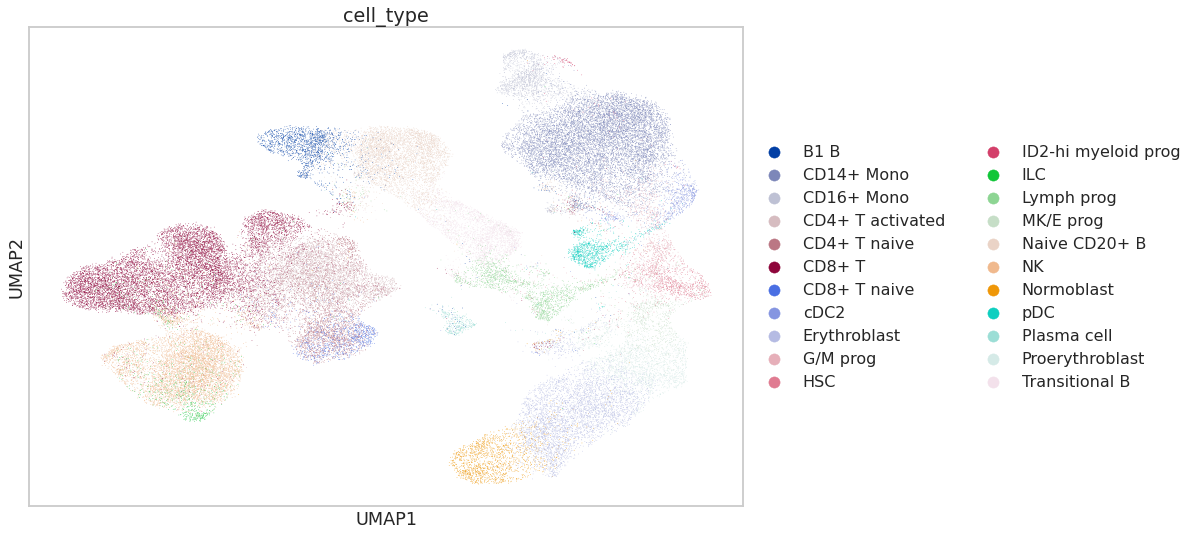

In [127]:
sc.pl.umap(ex.adata, color="cell_type", save='poissonviTrue.png')